# Gender and Context

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import title, xlabel, ylabel

import utils as utils

In [2]:
df = pd.read_feather("./data/imported_and_cleaned.feather")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3875 entries, 0 to 5089
Data columns (total 58 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Gender_Student                                3875 non-null   category
 1   Lang_Spoken_Home                              3875 non-null   category
 2   Books_Home                                    3875 non-null   category
 3   Own_Computer                                  3875 non-null   category
 4   Shared_Computer                               3875 non-null   category
 5   Smartphone                                    3875 non-null   category
 6   Internet_Access                               3875 non-null   category
 7   Study_Desk                                    3875 non-null   category
 8   Own_Room                                      3875 non-null   category
 9   ParentA_Edu_Level                             3875 non-nu

## Gender Based Findings


In [3]:
df["Gender_Student"].describe()

count     3875
unique       3
top        Boy
freq      1922
Name: Gender_Student, dtype: object

### 1.1 Distribution of genders of students among the sample


In [4]:
df["Gender_Student"].value_counts()
df["Gender_Student"] = df["Gender_Student"].apply(lambda  x : "Others" if "<Othe" in str(x) else x)

<Axes: >

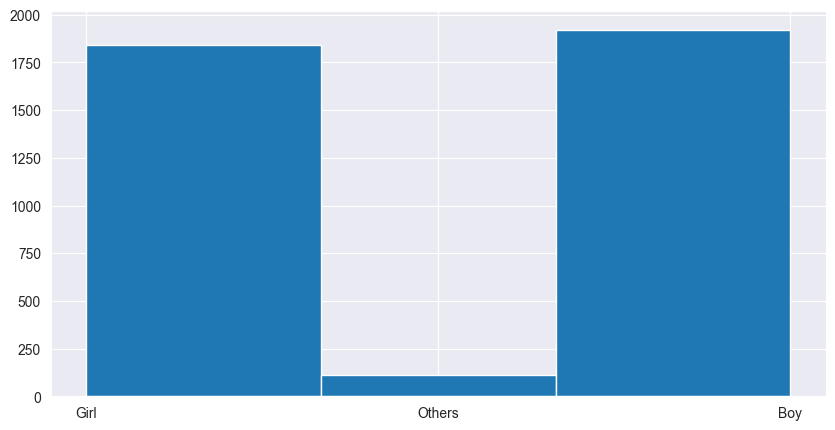

In [5]:
df["Gender_Student"].hist(bins=3 , figsize=(10,5))

### 1.2 Gender based distribution of pupils who own a computer

In [6]:
df["Own_Computer"].value_counts()

Own_Computer
Yes    3138
No      737
Name: count, dtype: int64

In [7]:
students_own_computer = df[df["Own_Computer"].str.contains("Yes")]
computers_by_gender = students_own_computer.groupby("Gender_Student", observed=False)["Own_Computer"].count()
computers_by_gender

Gender_Student
Others      90
Boy       1521
Girl      1527
Name: Own_Computer, dtype: int64

<Axes: title={'center': '## Gender based distribution of pupils who own a computer'}, xlabel='Gender', ylabel='Number of stdents owning a computer'>

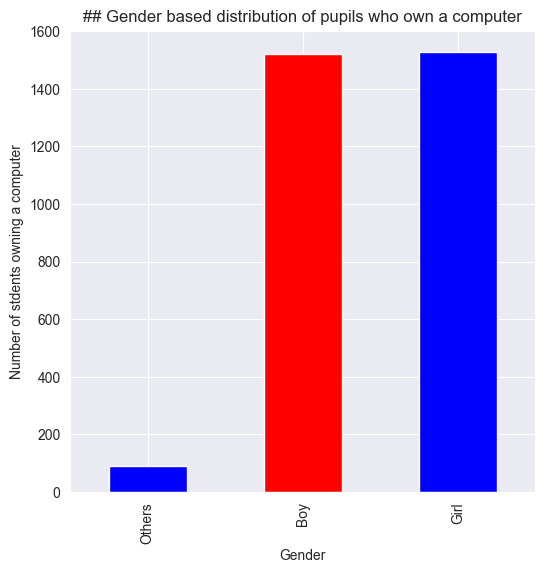

In [8]:
computers_by_gender.plot(kind="bar", color=["blue", "red"], title = "## Gender based distribution of pupils who own a computer", xlabel="Gender",
                         ylabel = "Number of stdents owning a computer", figsize=(6,6))

### 1.3 Distribution of shared computers, smartphones and internet access among genders

In [9]:
df["Smartphone"].value_counts() , df["Shared_Computer"].value_counts(), df["Internet_Access"].value_counts()


(Smartphone
 Yes    3839
 No       36
 Name: count, dtype: int64,
 Shared_Computer
 Yes    2702
 No     1173
 Name: count, dtype: int64,
 Internet_Access
 Yes    3855
 No       20
 Name: count, dtype: int64)

In [10]:
smartphoneByGender = utils.genderBasedGroupings(df, "Smartphone")
internetAccessByGender = utils.genderBasedGroupings(df, "Internet_Access")
sharedComputerByGender = utils.genderBasedGroupings(df, "Shared_Computer")
smartphoneByGender

AttributeError: module 'utils' has no attribute 'genderBasedGroupings'

In [36]:
internetAccessByGender

Gender_Student
Others     112
Boy       1910
Girl      1833
Name: Internet_Access, dtype: int64

In [37]:
print(sharedComputerByGender)

Gender_Student
Others      67
Boy       1275
Girl      1360
Name: Shared_Computer, dtype: int64


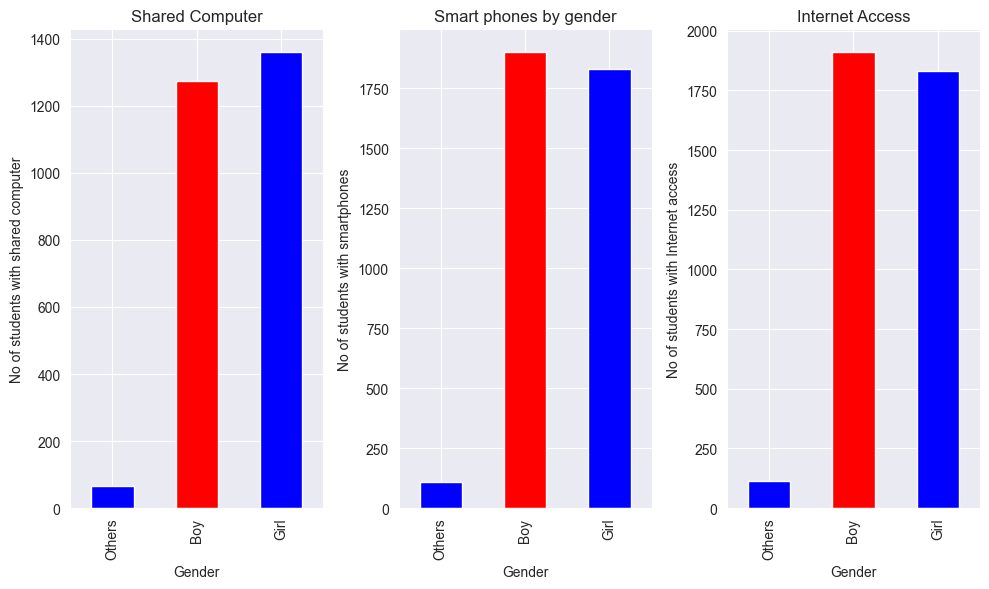

In [38]:
fig, axes = plt.subplots(1,3 ,figsize=(10,6))
sharedComputerByGender.plot(kind="bar", ax=axes[0] ,color=["blue", "red"] ,title="Shared Computer" ,xlabel="Gender", ylabel="No of students with shared computer" )
smartphoneByGender.plot(kind="bar", ax=axes[1] ,color=["blue", "red"] ,title="Smart phones by gender" ,xlabel="Gender", ylabel="No of students with smartphones" )
internetAccessByGender.plot(kind="bar", ax=axes[2] ,color=["blue", "red"] ,title="Internet Access" ,xlabel="Gender", ylabel="No of students with Internet access" )
plt.tight_layout()
plt.show()


### 1.4 Distribution of  own room and study desk among genders

In [39]:
booksatHome = utils.genderBasedGroupings(df, "Books_Home")
studyDeskByGender = utils.genderBasedGroupings(df, "Study_Desk")
ownroomByGender = utils.genderBasedGroupings(df, "Own_Computer")
print(studyDeskByGender)

Gender_Student
Others      96
Boy       1737
Girl      1697
Name: Study_Desk, dtype: int64


In [40]:
print(ownroomByGender)

Gender_Student
Others      90
Boy       1521
Girl      1527
Name: Own_Computer, dtype: int64


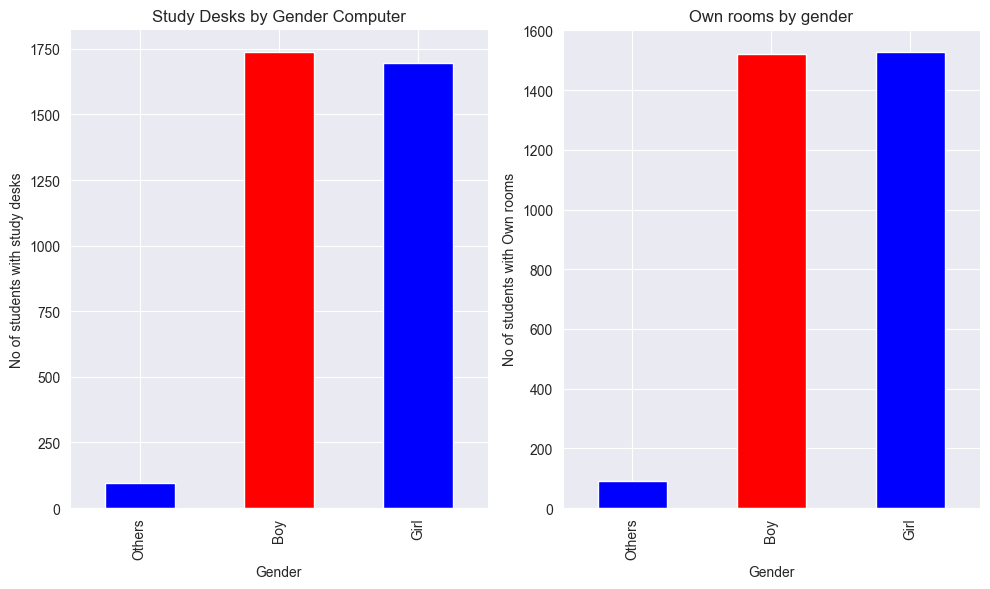

In [41]:
fig1, axes = plt.subplots(1,2 ,figsize=(10,6))
studyDeskByGender.plot(kind="bar", ax=axes[0] ,color=["blue", "red"] ,title="Study Desks by Gender" ,xlabel="Gender", ylabel="No of students with study desks" )
ownroomByGender.plot(kind="bar", ax=axes[1] ,color=["blue", "red"] ,title="Own rooms by gender" ,xlabel="Gender", ylabel="No of students with Own rooms" )
plt.tight_layout()
plt.show()

### 1.5 Distribution of books at home among genders

In [42]:
books_at_home = df["Books_Home"].value_counts()
print(books_at_home)

Books_Home
Enough to fill one bookcase (26–100 books)                1173
Enough to fill two bookcases (101–200 books)               797
Enough to fill one shelf (11–25 books)                     725
Enough to fill three or more bookcases (more than 200)     705
None or very few (0–10 books)                              475
Name: count, dtype: int64


### 1.6 Converting Books_Home to readable format and introduce Ordinality

In [43]:
df["Books_Home"] = df["Books_Home"].apply(lambda x : "few books" if "None or very few" in str(x) else x)
df["Books_Home"] = df["Books_Home"].apply(lambda x : "One Shelf" if "one shelf" in str(x) else x)
df["Books_Home"] = df["Books_Home"].apply(lambda x : "One Book Case" if "one bookcase" in str(x) else x)
df["Books_Home"] = df["Books_Home"].apply(lambda x : "Two Book Cases" if "two bookcases" in str(x) else x)
df["Books_Home"] = df["Books_Home"].apply(lambda x : "More than two bookcases" if "three or more" in str(x) else x)
df["Books_Home"] = pd.Categorical(df["Books_Home"] ,ordered=True, categories=["few books", "One Shelf", "One Book Case", "Two Book Cases", "More than two bookcases" ])
print(df["Books_Home"].value_counts())

Books_Home
One Book Case              1173
Two Book Cases              797
One Shelf                   725
More than two bookcases     705
few books                   475
Name: count, dtype: int64


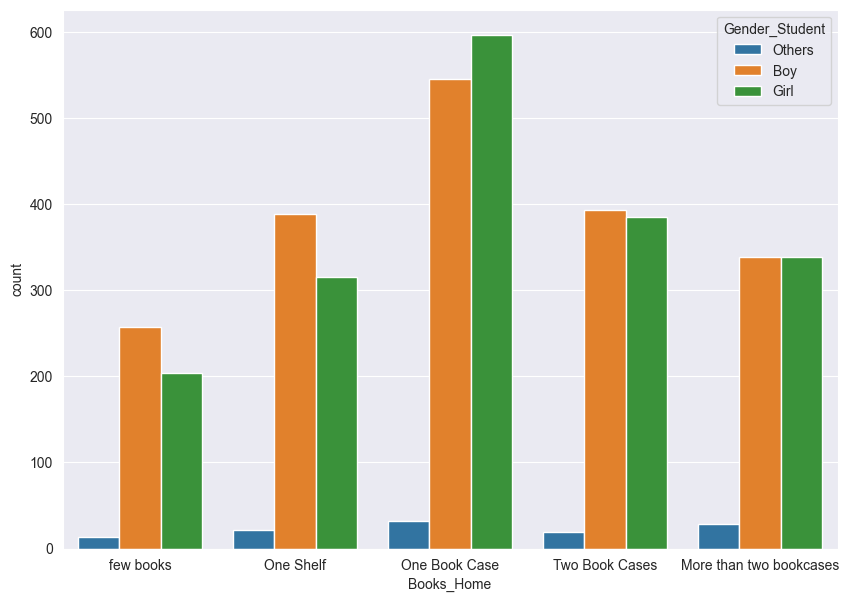

In [44]:
plt.figure(figsize=(10,7))
sns.countplot(data=df, x="Books_Home" ,hue="Gender_Student")
plt.show()


### 1.7 Gender wise distribution of Pupils having better living conditions(Own Room, Study Desk, Internet Access, Own Computer, Smartphones and Morethan two Bookcases)

In [45]:
studentsOwnComp = df["Own_Computer"].str.contains("Yes")
studentsHaveInternet = df["Internet_Access"].str.contains("Yes")
studentsHaveDesk = df["Study_Desk"].str.contains("Yes")
studentsHaveOwnRoom = df["Own_Room"].str.contains("Yes")
studentsHaveBooks = df["Books_Home"].str.contains("More than two bookcases")
goodCondition = df[studentsHaveDesk & studentsHaveBooks & studentsHaveOwnRoom & studentsHaveInternet & studentsOwnComp]

gendergroup = goodCondition.groupby(["Gender_Student"] , observed=False)["Gender_Student"]
print(gendergroup.count())

Gender_Student
Others     22
Boy       227
Girl      232
Name: Gender_Student, dtype: int64


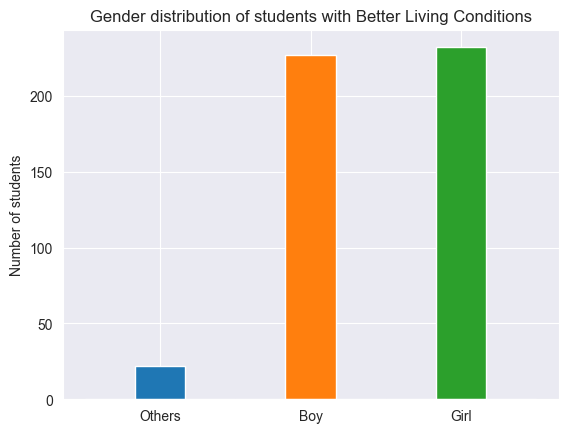

In [46]:
gendergroup.hist(bins=3)
plt.title("Gender distribution of students with Better Living Conditions")
plt.ylabel("Number of students")
plt.show()

### 1.8 Gender wise distribution of Pupils having bad living conditions(No Room, No Study Desk, No Internet Access, No Own Computer, No shared Computer and No Smartphones and few books)

In [47]:
studentsOwnComp = df["Own_Computer"].str.contains("No")
studentsOwnSharedComp = df["Shared_Computer"].str.contains("No")
studentsHaveInternet = df["Internet_Access"].str.contains("No")
studentsHaveDesk = df["Study_Desk"].str.contains("No")
studentsHaveOwnRoom = df["Own_Room"].str.contains("No")
studentsHaveBooks = df["Books_Home"].str.contains("few books")
badcondition = df[studentsHaveDesk & studentsHaveBooks & studentsHaveOwnRoom & studentsHaveInternet & studentsOwnComp]

gendergroup = badcondition.groupby(["Gender_Student"] , observed=False)["Gender_Student"]
print(gendergroup.count())

Gender_Student
Others    0
Boy       0
Girl      0
Name: Gender_Student, dtype: int64



### 1.9 Gender wise distribution of Pupils having moderate living conditions(Either of Own Room, Study Desk, Internet Access, Own Computer, Smartphones and  more than one book case)

In [48]:
studentsOwnComp = df["Own_Computer"].str.contains("Yes")
studentsHaveInternet = df["Internet_Access"].str.contains("Yes")
studentsHaveSharedComputer = df["Shared_Computer"].str.contains("Yes")
studentsHaveDesk = df["Study_Desk"].str.contains("Yes")
studentsHaveOwnRoom = df["Own_Room"].str.contains("Yes")
studentsHaveBooks = df["Books_Home"] >= "One Shelf"
moderate = df[(studentsHaveDesk  |studentsHaveSharedComputer| studentsHaveOwnRoom |  studentsHaveInternet |  studentsOwnComp) & studentsHaveBooks]

gendergroup = moderate.groupby(["Gender_Student"] , observed=False)["Gender_Student"]

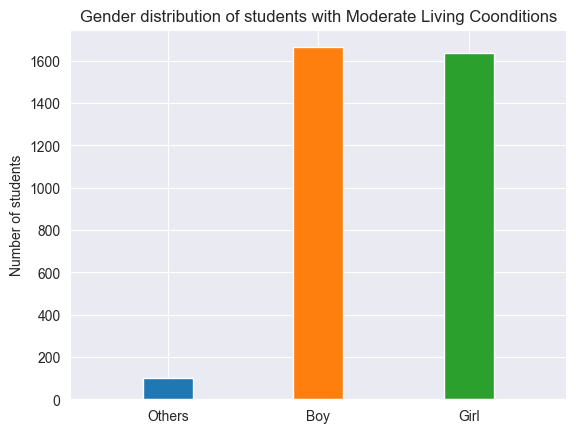

In [49]:
gendergroup.hist(bins=3)
plt.title("Gender distribution of students with Moderate Living Coonditions")
plt.ylabel("Number of students")
plt.show()

In [50]:
df.to_feather("./data/changed_books_home.feather")